In [2]:
import pickle

# Load meta dict

with open('../../PNC/AllSubjectsMeta.bin', 'rb') as f:
    meta = pickle.load(f)
    
print(len(list(meta.keys())))

941


In [9]:
subidsRest = [_id for _id in meta if 'rest' in meta[_id]]

# Load timeseries

def loadSeries(prefix, para, idx):
    with open('{:}/{:}_fmri_power264/timeseries/{:}.bin'.format(prefix, para, idx), 'rb') as f:
        return pickle.load(f)

rest_ts = [loadSeries('../../PNC', 'rest', meta[subid]['rest']) for subid in subidsRest]

print('Loading complete')

Loading complete


In [11]:
rest_ts[0].shape

(264, 124)

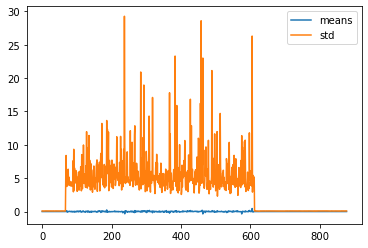

In [16]:
import numpy as np
import matplotlib.pyplot as plt

allMeans = [np.mean(ts) for ts in rest_ts]
allStd = [np.std(ts) for ts in rest_ts]

plt.plot(allMeans, label='means')
plt.plot(allStd, label='std')
plt.legend()
plt.show()

In [21]:
allStd[780]

0.0875970185756603

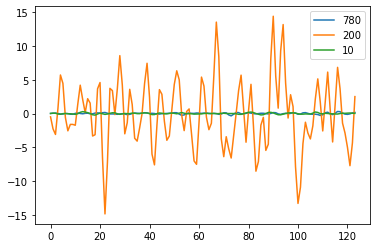

In [27]:
plt.plot(rest_ts[780][0], label='780')
plt.plot(rest_ts[200][0], label='200')
plt.plot(rest_ts[10][0], label='10')
plt.legend()
plt.show()

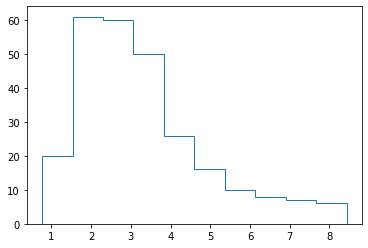

In [41]:
for i in range(200,201):
    rois = np.std(rest_ts[i], axis=1)
    plt.hist(rois, histtype='step')
    
plt.show()

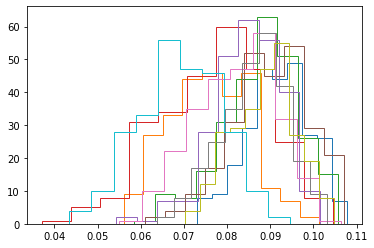

In [36]:

for i in range(10,20):
    rois = np.std(rest_ts[i], axis=1)
    plt.hist(rois, histtype='step')

plt.show()

In [55]:
for _id in meta.keys():
    if meta[_id].get('rest') == '200':
        print(_id)

602320995621


In [56]:
c = 0
for key in meta.keys():
    if 'rest' in meta[key]:
        if c == 200:
            print(key)
        c += 1

602320995621


In [57]:
rest_ts[200][0,:]

array([-4.94030415e-01, -2.26556243e+00, -3.09666733e+00,  7.86804644e-01,
        5.70897117e+00,  4.46397534e+00, -5.79897003e-01, -2.55991400e+00,
       -1.60597985e+00, -1.61207680e+00, -1.73386385e+00,  1.37444247e+00,
        4.20043439e+00,  2.06097495e+00,  1.26502097e-01,  2.19869992e+00,
        1.54678463e+00, -3.32925758e+00, -3.13828895e+00,  3.66000210e+00,
        4.59072780e+00, -6.55840457e+00, -1.48648745e+01, -7.17666938e+00,
        3.73119802e+00,  3.39506192e+00, -1.54881696e-01,  3.71000304e+00,
        8.57587695e+00,  4.23748123e+00, -3.00234023e+00, -1.35550065e+00,
        3.58501097e+00,  1.33077833e+00, -3.66051758e+00, -4.08414349e+00,
       -2.13214070e+00,  1.55577780e-02,  4.44543216e+00,  7.44460897e+00,
        2.42089007e+00, -6.01475057e+00, -7.59875094e+00, -1.69730364e+00,
        3.54103445e+00,  2.85062395e+00, -1.13411433e+00, -3.96227234e+00,
       -3.32889717e+00,  4.91243822e-01,  4.30029388e+00,  6.33034660e+00,
        5.00327415e+00, -

In [59]:
np.std(rest_ts[200][0,:])

5.032215968269523